In [ ]:
# KMeans Clustering

In [5]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Importing the mall dataset with pandas
dataset = pd.read_csv('A_Z_Mall_Customers.csv')
X = dataset.iloc[:, [3,4]].values

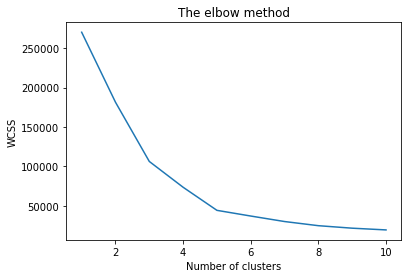

In [7]:
# Using the elbow methoed to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Note:
# init --> Method for initialization, as we don't want to fall inot random initialisation trap. default value is "k-means++"
# max_iter --> Maximum number of iterations of the k-means algorithm for a single run.
# n_init --> Number of time the k-means algorithm will be run with different intial centroid seeds. 
#            The final results will be the best output of n_init consecutive runs in terms of inertia.


In [9]:
# Applying k-means to the mall dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

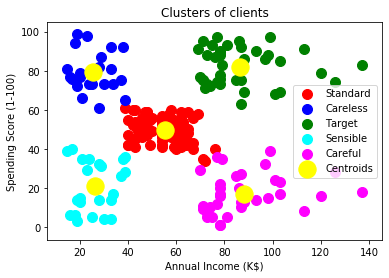

In [14]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Standard')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Careless')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Sensible')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Careful')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Note : Make sure this is a 2-D dataset, if you are workin with more than 2-D then you can not use this code snippet